<a href="https://colab.research.google.com/github/anclima/datascience/blob/master/Analisando_os_Dados_do_Airbnb_BERLIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb em Belin na Alemanha

O [Airbnb](https://www.airbnb.com.br/) é considerado  a **maior empresa hoteleira da atualidade** mas que **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Berlin, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Berlin (good for visualisations).*


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/germany/be/berlin/2019-11-12/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.




**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.



In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,cafeheaven Pberg/Mitte,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,21,60,18,2018-11-11,0.24,1,251
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.14,1,344
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.35,1,317
3,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,125,3,128,2019-10-21,1.08,1,20
4,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,3,266,2019-11-09,2.13,2,30


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
#df.shape
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}".format(df.shape[1]))
print("\t")
# verificar os tipos de variáveis
df.dtypes


Variáveis:	 24586
Entradas:	 16
	


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending =False)



reviews_per_month                 0.165989
last_review                       0.165989
name                              0.002074
host_name                         0.001139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

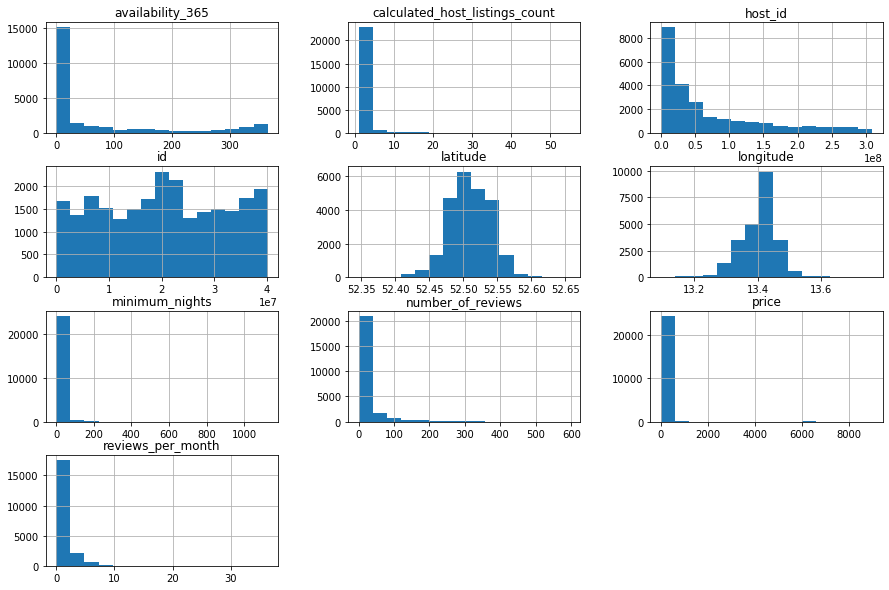

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

In [0]:
# ver a média da coluna `price`
media = df['price'].mean()
print("A média de preços é de", media, "euros")




A média de preços é de 72.7332628325063 euros


### **Q4. Qual a correlação existente entre as variáveis**

In [0]:
# criar uma matriz de correlação
df_clean = df.copy()
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.006561,0.000303,0.037287,0.075770,0.128339
minimum_nights,-0.006561,1.000000,-0.034653,-0.068127,0.038850,0.128465
number_of_reviews,0.000303,-0.034653,1.000000,0.599117,0.083109,0.262942
reviews_per_month,0.037287,-0.068127,0.599117,1.000000,0.130281,0.248776
calculated_host_listings_count,0.075770,0.038850,0.083109,0.130281,1.000000,0.261798
availability_365,0.128339,0.128465,0.262942,0.248776,0.261798,1.000000


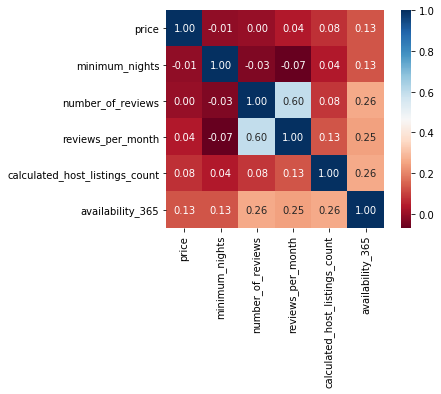

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    12381
Private room       11616
Hotel room           295
Shared room          294
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.503579
Private room       0.472464
Hotel room         0.011999
Shared room        0.011958
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Forst Grunewald          400.000000
Volkspark Wilmersdorf    365.777778
Frankfurter Allee Süd    172.926829
Schöneberg-Nord          171.303957
Allende-Viertel          166.500000
Haselhorst               164.000000
Alexanderplatz           135.461416
Regierungsviertel        121.911765
Düsseldorfer Straße      118.321429
Kurfürstendamm           117.500000
Name: price, dtype: float64

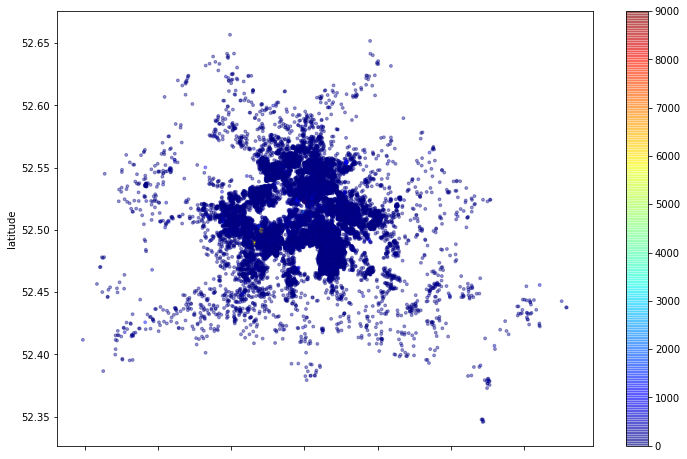

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


# Mapa turístico de Belin
Baseado no gráfico plotado acima, abaixo podemos ver o mapa da cidade de Berlim e comparado com o gráfico podemos ver que a concentração de imóveis disponíveis para locação está ligado diretamente a proximidade dos pontos turísticos.


<img src="https://www.mapsland.com/maps/europe/germany/berlin/large-detailed-berlin-top-tourist-attractions-map.jpg" >

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
media2 = df['minimum_nights'].mean()
print("Média de noites mínimas é de ", media2)

Média de noites mínimas é de  7.26543561376393


## Conclusões



"*Berlin é Berlin*", como gosta de falar um grande professor aqui de Fortaliza-CE chamado Mauro Oliveira. Na análise podemos concluir que a maior quantidade de locais disponíveis são do tipo inteiro, ou seja, casa ou apartamento exclusivos para que quer alugar e que a quantidade mínimas de noites em média é de 7. Pra finalizar, colocamos um mapa turístico de Berlin e comparamos com o gráfico criado a partir das informações de latitude e longitude, como pode ser percebido a oferta de imóveis está relacionada diretamente a proximidade de pontos turísticos.


